In [1]:
#def定義函式
#read_csv()可以用來讀取csv檔
import pandas as pd
def load_housing_data():
    csv_path = "housing.csv"
    return pd.read_csv(csv_path)

In [2]:
### Look at the Data Structure 瀏覽資料結構 ###

In [3]:
housing=load_housing_data()
housing.head()
# longitude 經度
# latitude 緯度
#housing_median_age 房屋年齡中位數
#median_income 收入中位數
#median_house_value房屋價值中位數
#ocean_proximity 接近海洋程度

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
#使用.info()可以看到該檔案的資訊
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
#len() 輸出list長度，本案例有20640行資料

len(housing)

20640

In [6]:
#housing["ocean_proximity"] 使用"ocean_proximity"序列資料
#value_counts() 唯一值得記數

housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
#describe()輸出統計描述
#count計數，mean平均數，std標準差，min最小值，max最大值

housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


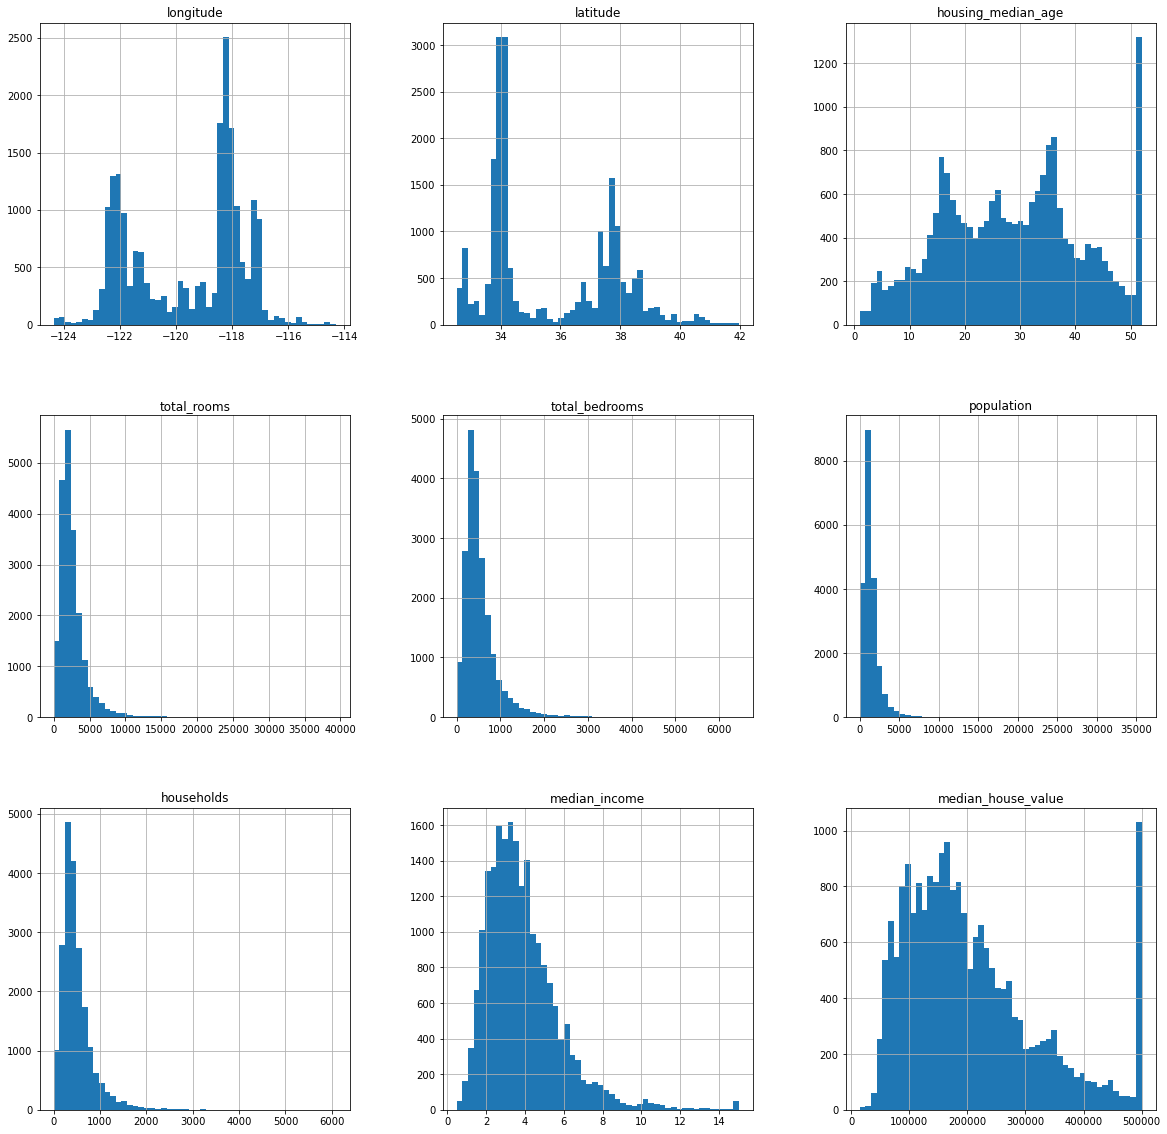

In [8]:
#%matplotlib inline是一個魔法函式。官方給出的定義是：IPython有一組預先定義好的所謂的魔法函式，可以通過命令列的語法形式來訪問它們。
#hist()函數用於繪製直方圖
#bins:此參數是可選參數，它包含整數，序列或字符串。
#figsize可以用來改變圖形大小與格式

%matplotlib  inline    
import  matplotlib.pyplot  as  plt 
housing.hist(bins=50,  figsize=(20,20))
plt.show()

##圖2-8##

In [9]:
###  創建資料測試數據集  ####

In [10]:
#python資料切割
#data資料集；test_ratio:測試機佔比
#len()計算()裡面字串、列表、字典、元組個數
#np.random.permutation可以打亂資料讓資料重新排列
#shuffled_indices 洗牌
#test_indice 測試資料 
#train_indices 訓練資料

import  numpy  as  np 
def  split_train_test(data,  test_ratio): 
    shuffled_indices  =  np.random.permutation(len(data)) 
    test_set_size  =  int(len(data)  *  test_ratio) 
    test_indices  =  shuffled_indices[:test_set_size] 
    train_indices  =  shuffled_indices[test_set_size:] 
    return  data.iloc[train_indices],  data.iloc[test_indices]

In [11]:
#可以調整切割在那些部分

train_set,  test_set  =  split_train_test(housing,  0.2)
len(train_set)

16512

In [12]:
len(test_set)

4128

In [13]:
##### crc32 #######

In [14]:
#借助zlib.crc32()方法，我們可以為特定數據計算crc32(循環冗餘校驗)的校驗和
#當&作為位運算時，1&1=1 ，1&0=0，0&0=0
#**為次方 2**32為2的32次方
#int() 64 位有符號整數
#~位元反運算

from zlib import crc32
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [15]:
###增加一個索引給資料集為 housing_with_id

housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [16]:
### Index為資料索引
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [17]:
len(train_set)

16512

In [18]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [19]:
len(train_set)

16322

In [20]:
####分層隨機抽樣####

In [21]:
#sklearn套件 --> https://ithelp.ithome.com.tw/articles/10204845 
#random_state是一個隨機種子，是在任意帶有隨機性的類或函數裡作為參數來控制隨機模式。當random_state取某一個值時，也就確定了一種規則。
#固定random_state後，每次構建的模型是相同的、生成的數據集是相同的、每次的拆分結果也是相同的。

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [22]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


In [23]:
#pd.cut[] 函數創建具有 5 個類別的收入類別屬性（標記為從 1 到 5）
#第 1 類的範圍從 0 到 1.5（即，低於 15,000 美元），第 2 類從 1.5 到 3，依此類推：
#bins[]可以用來設定寬度

housing["income_cat"] = pd.cut(housing["median_income"],
bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

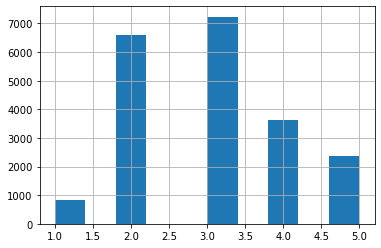

In [24]:
### 匯入 matplotlib 套件
###hist() 繪製直條圖 

import matplotlib.pyplot as plt
housing["income_cat"].hist()

In [25]:
###StratifiedShuffleSplit() 分層抽樣
#參數：
#n_splits:int，默認= 10
#re-shuffling和拆分迭代的次數。
#test_size:float或int，默認為None
#如果為float，則應在0.0到1.0之間，並且代表要包含在測試拆分中的數據集的比例。
#train_size:float或int，默認為None
#如果為float，則應在0.0到1.0之間，並且代表要包含在分割中的數據集的比例。
#random_state:整型控製所產生的訓練和測試指標的隨機性。

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [26]:
### 計算收入類別的資料比例
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [27]:
#### 繪製點散圖 Visualizing Geographical Data ####

In [28]:
#Python pandas.DataFrame.drop用法及代碼示例
#參數：
#labels：單標簽或list-like
#要刪除的索引或列標簽。元組將用作單個標簽，而不被視為list-like。

#axis：{0 或 ‘index’，1 或 ‘columns’}，默認 0
#是否從索引(0 或 ‘index’)或列(1 或 ‘columns’)中刪除標簽。

#index：單標簽或list-like
#替代指定軸(labels, axis=0 等效於 index=labels)。

#columns：單標簽或list-like
#替代指定軸(labels, axis=1 等效於 columns=labels)。

#level：int 或級別名稱，可選
#對於 MultiIndex，將刪除標簽的級別。

#inplace：布爾值，默認為 False
#如果為 False，則返回一個副本。否則，就地執行操作並返回 None。

#errors：{‘ignore’, ‘raise’}，默認 ‘raise’
#如果‘ignore’，抑製錯誤並且僅刪除現有標簽。

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

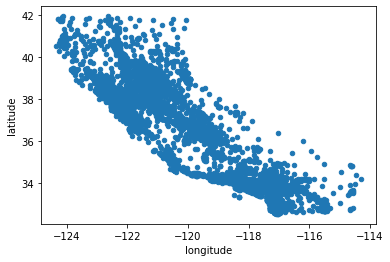

In [29]:
housing.plot(kind="scatter", x="longitude", y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

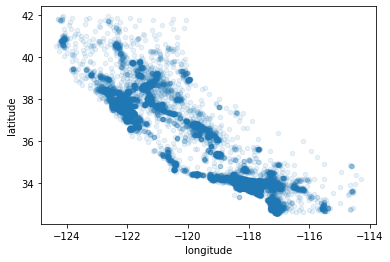

In [30]:
#alpha值 為設置點散圖透明度 alpha = 1為不透
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

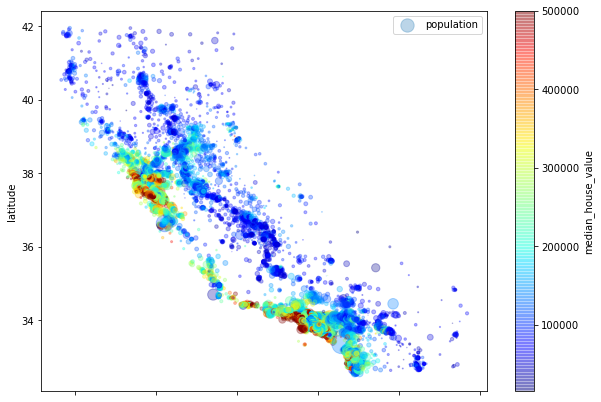

In [31]:
#用點的大小代表人口數量（參數s）,用顏色代表價格（參數c）,jet預定義顏色表（參數cmap）
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.3,
s=housing["population"]/100, label="population", figsize=(10,7),
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [32]:
#### Looking for Correlations 尋找相關性 ####
#Pandas dataframe.corr()用於查找數據幀中所有列的成對相關性。
corr_matrix = housing.corr()

In [33]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [34]:
### 查看每個屬性與房屋中值的相關程度
##排序(sort) 要將序列由大到小設定 ascending=False

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

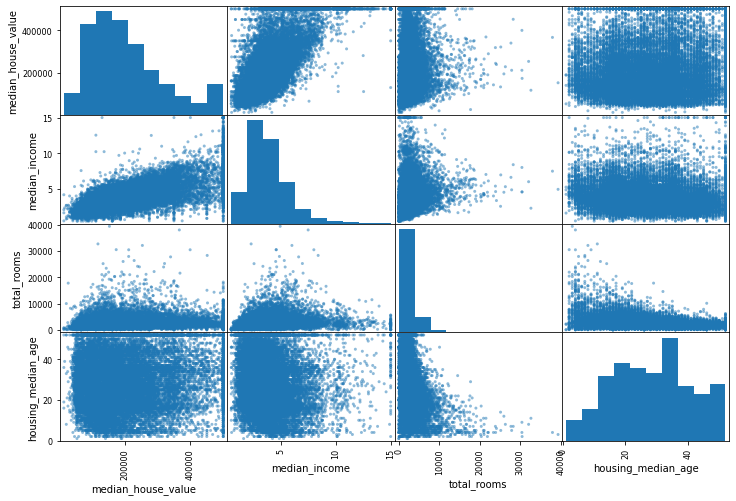

In [35]:
### scatter_matrix 散點矩陣
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
    "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

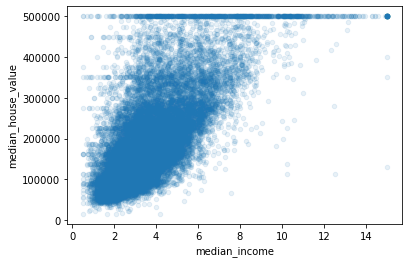

In [36]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.1)
# 這邊薪資與房價關聯性
#情節揭示了其他不太明顯的直線：一條大約 450,000 美元的水平線，
#另一個大約 350,000 美元，也許一個大約 280,000 美元，還有一些低於此。

In [37]:
#rooms per household 平均每戶房間
#bedrooms_per_room 平均每戶臥室
#population_per_household 每戶人口
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [38]:
corr_matrix = housing.corr()

In [39]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,-0.027540,0.092657,0.002476
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,0.106389,-0.113815,0.002366
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,-0.153277,0.136089,0.013191
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,0.133798,-0.187900,-0.024581
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.001538,0.084238,-0.028355
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,-0.072213,0.035319,0.069863
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,-0.080598,0.065087,-0.027309
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,0.326895,-0.615661,0.018766
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.151948,-0.255880,-0.023737
rooms_per_household,-0.027540,0.106389,-0.153277,0.133798,0.001538,-0.072213,-0.080598,0.326895,0.151948,1.000000,-0.416952,-0.004852


In [40]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [41]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


In [42]:
### Prepare the Data for Machine Learning Algorithms 為機器學習算法準備數據
###這邊主要開始整理數據

In [43]:
### 這邊把資還原
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [44]:
housing.info()
#這邊可以看到 total_bedrooms 只有 16354筆
#代表裡面有缺資料

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [45]:
#### Data Cleaning數據清洗 3種方式
#housing.dropna(subset=["total_bedrooms"]) # option 1

#housing.drop("total_bedrooms", axis=1) # option 2

#median = housing["total_bedrooms"].median() # option 3
#housing["total_bedrooms"].fillna(median, inplace=True)

In [46]:
## SimpleImputer 這方式可以處理缺失的數值
#這邊使用 "中位數" 來填補空值
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [47]:
#這邊使用 ocean_proximity 創建一個乾淨的數據集
housing_num = housing.drop("ocean_proximity", axis=1)

In [48]:
#statistics_ 參數 代表要替換的數值為多少
#這邊都使用中位數數值做填補
imputer.fit(housing_num)
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [49]:
#現在你可以使用這個“訓練過的” imputer 通過替換來轉換訓練集
#學習中位數的缺失值：
X = imputer.transform(housing_num)

In [50]:
#結果是一個簡單的 NumPy 數組，其中包含轉換後的特徵。 如果你想
#把它放回 Pandas DataFrame 中，很簡單：
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [51]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.0 MB


In [52]:
### 處理文字型態資料 Handling Text and Categorical Attributes
# 這邊ocean_proximity 為文字型態

In [53]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [54]:
#OrdinalEncoder 文字轉換器
#缺點日後不方便運算
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [55]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [56]:
#將 ocean_proximity 欄位裡資料轉換成0-4的list
##0-4對應各個文字
housing_cat_encoded

array([[1.],
       [4.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]])

In [57]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [58]:
#OneHotEncoder 變成轉換成矩陣，運算上比較好
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [59]:
#toArray() 方法將Arraylist 對象轉換為數組。
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [60]:
### Custom Transformers（定制變換器）

In [61]:
##匯入sklearn.base中的估算器BaseEstimator、轉換器TransformerMixin，
#其中的 __init__() 方法就是物件 (object) 建立時所執行的方法

from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
            bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [62]:
#shape查詢資料多少筆數與多少欄位
#以下可以看到有16512筆資料，總共9個欄位
housing.shape

(16512, 9)

In [63]:
#透過上面class產生物件 
#然後下面attr_adder.transform呼叫上面的transform然後把housing.values丟上去運算
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [64]:
#透過上面class產生物件 
#然後下面attr_adder.transform呼叫上面的transform然後把housing.values丟上去運算
housing_extra_attribs.shape

(16512, 11)

In [65]:
### Feature Scaling 資料預處理

In [66]:
#MinMaxScaler 在MinMaxScaler中是給定了一個明確的最大值與最小值

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(housing_num)
scaler.transform(housing_num)

array([[0.28784861, 0.63549416, 0.54901961, ..., 0.06261386, 0.13144137,
        0.11542599],
       [0.70916335, 0.05844846, 0.11764706, ..., 0.05639172, 0.14301718,
        0.40257376],
       [0.52888446, 0.30074389, 0.84313725, ..., 0.01861039, 0.05563854,
        0.16379774],
       ...,
       [0.1623506 , 0.62699256, 0.92156863, ..., 0.0127526 , 0.0317401 ,
        0.18481124],
       [0.16434263, 0.61317747, 0.25490196, ..., 0.03377337, 0.09316654,
        0.25492752],
       [0.22011952, 0.78958555, 0.50980392, ..., 0.01743322, 0.03640777,
        0.18151474]])

In [67]:
#StandardScaler 將所有特徵標準化，也就是高斯分佈。使得數據的平均值為0，方差為1。
#適合的使用時機於當有些特徵的方差過大時，使用標準化能夠有效地讓模型快速收斂。

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(housing_num)
scaler.transform(housing_num)

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.73260236,
         0.55628602, -0.8936472 ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.53361152,
         0.72131799,  1.292168  ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.67467519,
        -0.52440722, -0.52543365],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.86201341,
        -0.86511838, -0.36547546],
       [-1.56080303,  1.2492109 , -1.1653327 , ..., -0.18974707,
         0.01061579,  0.16826095],
       [-1.28105026,  2.02567448, -0.13148926, ..., -0.71232211,
        -0.79857323, -0.390569  ]])

In [68]:
#Pipeline可以將許多演算法模型串聯起來
#比如將特徵提取、歸一化、分類組織在一起形成一個典型的機器學習問題工作流。主要帶來兩點好處：
#直接呼叫fit和predict方法來對pipeline中的所有演算法模型進行訓練和預測。
#可以結合grid search對引數進行選擇。
#Pipeline 構建管道 好處減少資料「預處理+ 分類」程式量
#strategy="median"將null補上中位數

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
('imputer', SimpleImputer(strategy="median")),
('attribs_adder', CombinedAttributesAdder()),
('std_scaler', StandardScaler()),
])

In [69]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [70]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [71]:
#在Python的機器學習庫scikit-learn中，可以選擇地進行數據轉換
#例如，它允許將特定的轉換或轉換序列僅應用於數字列，而將單獨的轉換序列僅應用於類別列。
#必須指定一個轉換器列表。每個轉換器是一個三元素元組，用於定義轉換器的名稱
#要應用的轉換以及要應用於其的列索引，例如：（名稱，對象，列）
#ColumnTransformer()在Python的機器學習庫scikit-learn中，可以選擇地進行數據轉換
#例如，它允許將特定的轉換或轉換序列僅應用於數字列，而將單獨的轉換序列僅應用於類別列

from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", OneHotEncoder(), cat_attribs),
])

In [72]:
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
1481,-122.04,37.96,28.0,1207.0,252.0,724.0,252.0,3.6964,NEAR BAY
18125,-122.03,37.33,23.0,4221.0,671.0,1782.0,641.0,7.4863,<1H OCEAN
5830,-118.31,34.20,36.0,1692.0,263.0,778.0,278.0,5.0865,<1H OCEAN
17989,-121.95,37.27,17.0,1330.0,271.0,408.0,258.0,1.7171,<1H OCEAN
4861,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999,<1H OCEAN


In [73]:
housing_prepared = full_pipeline.fit_transform(housing)

In [74]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [75]:
#### Select and Train a Model選擇和訓練模型
###Training and Evaluating on the Training Set 在訓練集上訓練和評估

In [76]:
### LinearRegression 線性回歸預測
##housing_prepared 住房準備 來自前面已經轉製好的資料
##housing_labels 住房標籤 
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)
print(housing.shape)
print(housing_labels.shape)

(16512, 9)
(16512,)


In [77]:
#iolc
#[:5] 前5筆資料意思
#[100:200] 第100筆到199筆資料
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [78]:
#predict() 利用線性迴歸分析模型預測
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [79]:
print("Labels:", list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [80]:
###RMSE 越小越好
#mean_squared_error MSE 均方誤差 
#是各測量值誤差的平方和取平均值的平方根（均方根誤差的平方）
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(some_data_prepared)
lin_mse = mean_squared_error(some_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

47159.22387406722

In [81]:
some_data = housing.iloc[-5:]
some_labels = housing_labels.iloc[-5:]
some_data_prepared = full_pipeline.transform(some_data)

In [82]:
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [293885.44462114  81131.30445277 220683.15054463 238863.55319782
  98197.80203821]


In [83]:
##np.sqrt() 平方根
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(some_data_prepared)
lin_mse = mean_squared_error(some_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

41966.29269365927

In [84]:
####DecisionTreeRegressor決策樹回歸 

In [85]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [86]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [ ]:
###=0.0 通常是過度擬和
#實際上不太可能

In [89]:
#cross_val_score 交叉驗證
#將資料分成幾等分後
#再去訓練資料
#CV=10 就是10等分

from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [90]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())    

In [91]:
display_scores(tree_rmse_scores)

Scores: [72013.31273324 70015.74805761 68210.32930422 72628.09700733
 68000.4731388  76040.59762969 72315.10726588 72801.48107891
 68292.83772545 71833.13769272]
Mean: 71215.11216338453
Standard deviation: 2436.5602323550374


In [92]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
    scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)
#使用線性回歸去跑結果似乎比較好

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.328209818068


In [98]:
## RandomForestRegressor 隨機森林回歸器
#full_pipeline 類似管道
from sklearn.ensemble import RandomForestRegressor
housing_prepared = full_pipeline.transform(housing)
print(housing_prepared.shape)
print(housing_labels.shape)
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
housing_predictions=forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error( housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print("rmse:",forest_rmse)
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
    scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

(16512, 16)
(16512,)
rmse: 18665.354313272786
Scores: [51329.4910219  49069.42109299 46991.01665392 51574.42733052
 47433.49201431 52071.16141245 52109.54845589 49774.25726542
 48507.34015493 53954.52842079]
Mean: 50281.46838231139
Standard deviation: 2159.125677769904


In [94]:
#joblib.dump儲存資料
import joblib
joblib.dump(lin_reg, "my_line.pkl")
joblib.dump(tree_reg, "my_tree.pkl")
joblib.dump(forest_reg, "forest.pkl")

['forest.pkl']

In [95]:
my_line1 = joblib.load("my_line.pkl")

In [96]:
some_data = housing.iloc[-5:]
some_labels = housing_labels.iloc[-5:]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", my_line1.predict(some_data_prepared))

Predictions: [293885.44462114  81131.30445277 220683.15054463 238863.55319782
  98197.80203821]


In [97]:
######網格搜尋（GridSearchCV）####
#下面程式碼，我們要搜尋兩種網格，一種是n_estimators
#一種是max_features。GridSearch會挑選出最適合的超參數值。
#param會先評估3*4=12 種組合方式 
#接下來在會在bootstrap=False的情況下（預設該值爲True）
#評估2×3=6種12種n_estimators和max_features的組合方式
#所以最終會有 12+6=18 種不同的超參數組合方式
#而每一種組合方式要在訓練集上訓練5次(因爲cv=5)， 所以一共要訓練18×5=90 次

from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [99]:
#grid_search.best_params_輸出結果如下：
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [100]:
#您還可以直接獲得最佳估算器：
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [101]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)
###RMSE 分數最低有49682

63902.69848569546 {'max_features': 2, 'n_estimators': 3}
56176.343674901385 {'max_features': 2, 'n_estimators': 10}
52888.781961488654 {'max_features': 2, 'n_estimators': 30}
60038.13498391988 {'max_features': 4, 'n_estimators': 3}
52761.79353901153 {'max_features': 4, 'n_estimators': 10}
50449.98232161987 {'max_features': 4, 'n_estimators': 30}
59229.31499809261 {'max_features': 6, 'n_estimators': 3}
52574.59016591421 {'max_features': 6, 'n_estimators': 10}
49884.49855520484 {'max_features': 6, 'n_estimators': 30}
58726.37915596678 {'max_features': 8, 'n_estimators': 3}
52064.84521288675 {'max_features': 8, 'n_estimators': 10}
50071.76520711078 {'max_features': 8, 'n_estimators': 30}
62035.13958550208 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54406.34275552965 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59335.668818118844 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53120.01566992187 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [116]:
###RandomizedSearchCV 隨機搜索
#RandomizedSearchCV使用方法和類GridSearchCV 很相似
from sklearn.model_selection import RandomizedSearchCV
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = RandomizedSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',n_iter=5,
return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=5,
                   param_distributions=[{'max_features': [2, 4, 6, 8],
                                         'n_estimators': [3, 10, 30]},
                                        {'bootstrap': [False],
                                         'max_features': [2, 3, 4],
                                         'n_estimators': [3, 10]}],
                   return_train_score=True, scoring='neg_mean_squared_error')

In [117]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

60194.03736633566 {'n_estimators': 3, 'max_features': 4}
51684.095166747175 {'n_estimators': 10, 'max_features': 4, 'bootstrap': False}
52269.65417586979 {'n_estimators': 10, 'max_features': 8}
52100.45550491349 {'n_estimators': 10, 'max_features': 6}
60148.332866264034 {'n_estimators': 3, 'max_features': 3, 'bootstrap': False}
